# Import Libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile(r"/content/drive/MyDrive/plant_disease_dataset.zip", "r")
zip_ref.extractall()
zip_ref.close()

## Training Image Preprocessing

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/plant disease dataset/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224,224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


## Validation Image Preprocessing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/plant disease dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224,224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


# Model Building

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Add, MaxPooling2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.models import Model

def identity_block(input_tensor, filters, kernel_size):
    filters1, filters2, filters3 = filters

    x = Conv2D(filters1, (1, 1))(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters2, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters3, (1, 1))(x)
    x = BatchNormalization()(x)

    x = Add()([x, input_tensor])
    x = Activation('relu')(x)
    return x

def convolutional_block(input_tensor, filters, kernel_size, strides=(2, 2)):
    filters1, filters2, filters3 = filters

    x = Conv2D(filters1, (1, 1), strides=strides)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters2, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters3, (1, 1))(x)
    x = BatchNormalization()(x)

    shortcut = Conv2D(filters3, (1, 1), strides=strides)(input_tensor)
    shortcut = BatchNormalization()(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

def ResNet50(input_shape=(224, 224, 3), num_classes=38):
    inputs = Input(shape=input_shape)

    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = convolutional_block(x, filters=[64, 64, 256], kernel_size=(3, 3), strides=(1, 1))
    x = identity_block(x, filters=[64, 64, 256], kernel_size=(3, 3))
    x = identity_block(x, filters=[64, 64, 256], kernel_size=(3, 3))

    x = convolutional_block(x, filters=[128, 128, 512], kernel_size=(3, 3))
    x = identity_block(x, filters=[128, 128, 512], kernel_size=(3, 3))
    x = identity_block(x, filters=[128, 128, 512], kernel_size=(3, 3))
    x = identity_block(x, filters=[128, 128, 512], kernel_size=(3, 3))

    x = convolutional_block(x, filters=[256, 256, 1024], kernel_size=(3, 3))
    x = identity_block(x, filters=[256, 256, 1024], kernel_size=(3, 3))
    x = identity_block(x, filters=[256, 256, 1024], kernel_size=(3, 3))
    x = identity_block(x, filters=[256, 256, 1024], kernel_size=(3, 3))
    x = identity_block(x, filters=[256, 256, 1024], kernel_size=(3, 3))
    x = identity_block(x, filters=[256, 256, 1024], kernel_size=(3, 3))

    x = convolutional_block(x, filters=[512, 512, 2048], kernel_size=(3, 3))
    x = identity_block(x, filters=[512, 512, 2048], kernel_size=(3, 3))
    x = identity_block(x, filters=[512, 512, 2048], kernel_size=(3, 3))

    x = AveragePooling2D((7, 7))(x)
    x = Flatten()(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, x)
    return model

# Create ResNet50 model
model = ResNet50()
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 112, 112, 64)         9472      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 112, 112, 64)         256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 112, 112, 64)         0         ['batch_normalization[0][0

## Building convolutional layer

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 112, 112, 64)         9472      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 112, 112, 64)         256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 112, 112, 64)         0         ['batch_normalization[0][0

## Compiling the model

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
#history = model.fit(training_set, epochs=10, validation_data=validation_set)


In [10]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 819s 355ms/step - loss: 0.9627 - accuracy: 0.7147 - val_loss: 3.5780 - val_accuracy: 0.3725
Epoch 2/10
2197/2197 [==============================] - 751s 342ms/step - loss: 0.3030 - accuracy: 0.9019 - val_loss: 0.3647 - val_accuracy: 0.8905
Epoch 3/10
2197/2197 [==============================] - 752s 342ms/step - loss: 0.1896 - accuracy: 0.9379 - val_loss: 0.5977 - val_accuracy: 0.8451
Epoch 4/10
2197/2197 [==============================] - 751s 342ms/step - loss: 0.1479 - accuracy: 0.9516 - val_loss: 0.2182 - val_accuracy: 0.9319
Epoch 5/10
2197/2197 [==============================] - 751s 342ms/step - loss: 0.1038 - accuracy: 0.9656 - val_loss: 0.6797 - val_accuracy: 0.8331
Epoch 6/10
2197/2197 [==============================] - 751s 342ms/step - loss: 0.0843 - accuracy: 0.9725 - val_loss: 0.8261 - val_accuracy: 0.8240
Epoch 7/10
2197/2197 [==============================] - 750s 341ms/step - loss: 0.0674 - accuracy: 0.9773 - val_

# Model Evaluation

In [11]:
#Training set Accuracy
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 207s 94ms/step - loss: 0.1823 - accuracy: 0.9439
Training accuracy: 0.9438936114311218


In [12]:
print('Training loss:', train_loss)

Training loss: 0.18230409920215607


In [13]:
#Validation set Accuracy
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 52s 94ms/step - loss: 0.2388 - accuracy: 0.9294
Validation accuracy: 0.9293763041496277


In [14]:
print('Validation loss:', val_loss)

Validation loss: 0.23884925246238708


# Saving model

In [15]:
model.save('trained_plant_disease_model.keras')

In [16]:
model.save('trained_plant_disease_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
training_history.history #Return Dictionary of history

In [17]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [18]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Accuracy Visualization

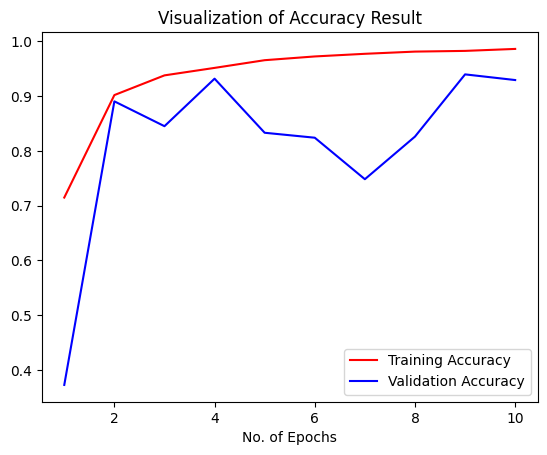

In [19]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()